# Morphology

In this tutorial we are going to learn how to use morphology operations


## Explanation

Images are asumed to be loaded either in RGB or Grayscale space.

1.   We will use OpenCV to load images.
2.   Convert from BGR to RGB (note that OpenCV loads images in BGR format).



In [3]:
!pip install kornia --upgrade

     |████████████████████████████████| 286kB 15.6MB/s 


In [ ]:
#@title
from google.colab import drive
drive.mount('/content/drive');

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!wget https://github.com/kornia/kornia-examples/raw/master/data/color/ninja_turtles.jpg

--2021-06-19 08:57:06--  https://github.com/kornia/kornia-examples/raw/master/data/color/ninja_turtles.jpg
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kornia/kornia-examples/master/data/color/ninja_turtles.jpg [following]
--2021-06-19 08:57:07--  https://raw.githubusercontent.com/kornia/kornia-examples/master/data/color/ninja_turtles.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 239772 (234K) [image/jpeg]
Saving to: ‘ninja_turtles.jpg’

ninja_turtles.jpg   100%[===================>] 234.15K  --.-KB/s    in 0.01s   

2021-06-19 08:57:07 (18.3 MB/s) - ‘ninja_turtles.jpg’ saved [239772/23

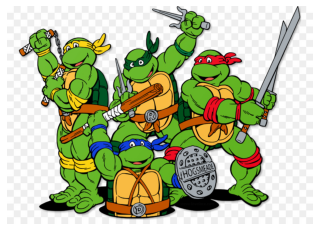

In [7]:
import torch
import kornia as K
from matplotlib import pyplot as plt
import cv2
import numpy as np

# load using opencv and convert to 
img_bgr: np.array = cv2.imread('ninja_turtles.jpg', cv2.IMREAD_COLOR)
img_rgb: np.array = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb); plt.axis('off');

Alternatively we can use use `kornia.color` to perform the color transformation.

1.   Convert the `np.array` to `torch.Tensor`
2.   Convert the tensor to RGB
3.   Convert back the tensor to numpy for visualisation.

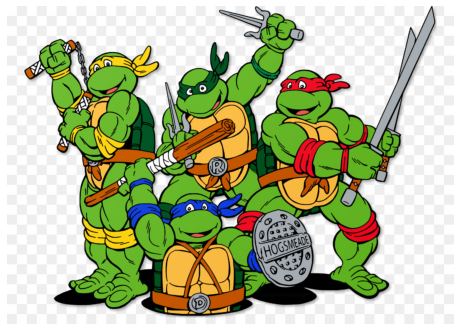

In [34]:
# convert the numpy array to torch
x_bgr: torch.Tensor = K.image_to_tensor(img_bgr, None).float()

# to BGR
x_rgb: torch.Tensor = K.bgr_to_rgb(x_bgr)

# convert back to numpy and visualize
img_np: np.array = K.tensor_to_image(x_rgb)/255.
plt.figure(figsize=(8,6))
plt.imshow(img_np); plt.axis('off');

Using `kornia` we easily perform grayscale dilation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


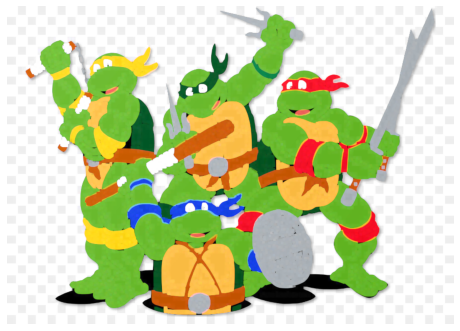

In [24]:
kernel = torch.ones(5,5)
struct_element = torch.relu(torch.rand(5,5))
x_rgb_dil = K.morphology.dilation(x_rgb, kernel, struct_element)
plt.figure(figsize=(8,6))
plt.imshow(K.tensor_to_image(x_rgb_dil)/255.); plt.axis('off');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


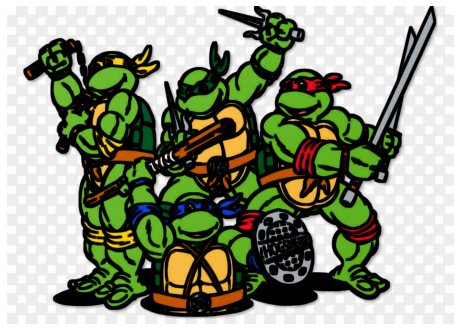

In [25]:
x_rgb_dil = K.morphology.erosion(x_rgb, kernel, struct_element)
plt.figure(figsize=(8,6))
plt.imshow(K.tensor_to_image(x_rgb_dil)/255.); plt.axis('off');

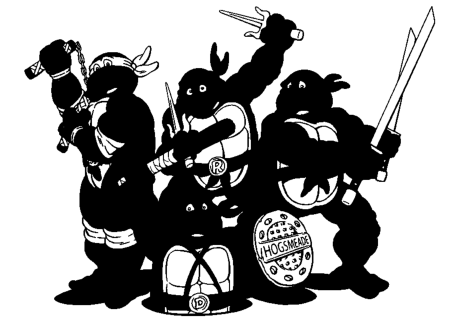

In [30]:
x_binary = x_rgb.mean(dim=1, keepdim=True) > 128
plt.figure(figsize=(8,6))
plt.imshow(K.tensor_to_image(x_binary), cmap='gray'); plt.axis('off');

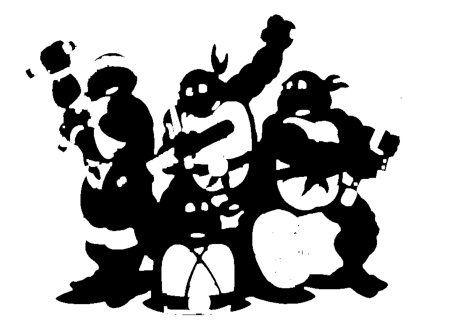

In [33]:
x_binary_dilation =  K.morphology.dilation(x_binary.float(), kernel)
plt.figure(figsize=(8,6))
plt.imshow(K.tensor_to_image(x_binary_dilation), cmap='gray'); plt.axis('off');

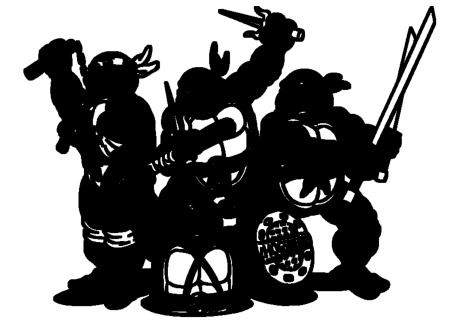

In [38]:
x_binary_erosion =  K.morphology.erosion(x_binary.float(), kernel)
plt.figure(figsize=(8,6))
plt.imshow(K.tensor_to_image(x_binary_erosion), cmap='gray'); plt.axis('off');